In [5]:
%matplotlib nbagg
import matplotlib
import numpy as np
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from scipy import integrate
from pylab import *
from IPython.display import HTML

In [6]:
def solve_rlc(params):
    (V,R,L,C) = params
    def rlc(A,t):
        Vc,x=A
        return array([x,(V-Vc-(x*R*C))/(L*C)])

    time = linspace(0.0,0.6e-6,1001)
    vc,x = integrate.odeint(rlc,[0.0,0.0],time).T 
    i=C*x #current 
    return (vc,i,time)

<IPython.core.display.Javascript object>


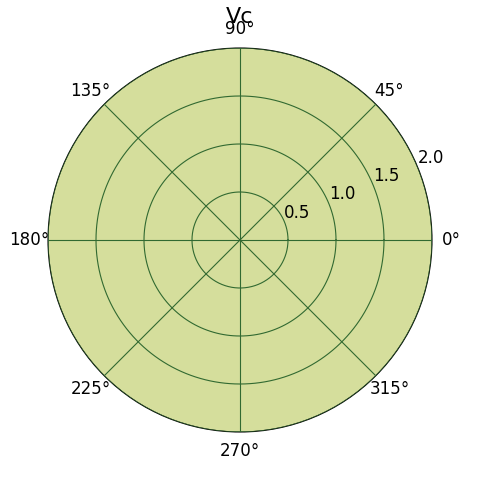

In [14]:

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
        comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)


# radar green, solid grid lines
plt.rc('grid', color='#316931', linewidth=1, linestyle='-')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO
width, height = matplotlib.rcParams['figure.figsize']
size = min(width, height)
# make a square figure
fig = plt.figure(figsize=(size, size))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, axisbg='#d5de9c')
ax.set_rmax(2.0)
plt.grid(True)
ax.set_title("Vc", fontsize=20)

# ploting under damped case
V = 1.0
R = 2.0
L = 100.0e-9 
C = 1.0e-9 
(vc,i,t) = solve_rlc((V,R,L,C))
t=t[:700]
alpha = R/(2*L)
w = sqrt(1/(L*C)-alpha*alpha)

with writer.saving(fig, "animation.mp4", 100):
    for i in t:
        length = exp(-1*alpha*(i))
        arr2 = plt.arrow(w*i, 0, 0, (length)*2*0.8, alpha = 0.5, width = 0.015, head_width=0.1, head_length=(length)*2*0.2,
                 edgecolor = 'black', facecolor = 'red', lw = 2, zorder = 5)
        writer.grab_frame()
        arr2.remove()